In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
# load clean dataset
filepath = "C:/Users/bvkka/Desktop/FinalProject/Area51Financial/NN_dataset.csv"
Data = pd.read_csv(filepath)
Data.columns

Index(['Customer_ID', 'Num_CC', 'Dependents', 'Status_Checking_Acc',
       'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc',
       'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans ', 'Housing', 'Job',
       'Telephone', 'Foreign_Worker', 'Duration_binned',
       'Credit_amount_binned', 'Age_binned', 'Default_On_Payment'],
      dtype='object')

In [3]:
# set Customer_ID as index
Data.set_index('Customer_ID',inplace=True)

In [4]:
#Encoding data columns
#Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.
#In order to encode this data, you could map each value to a number
#This process is known as label encoding, and sklearn conveniently will do this for you using Label Encoder.


from sklearn.preprocessing import LabelEncoder

#creating labelEncoder
label_encoder = LabelEncoder()
# Converting string labels into numbers.
label_encoder.fit(Data['Dependents'])
Data['Dependents'] = label_encoder.transform(Data['Dependents'])

label_encoder.fit(Data['Status_Checking_Acc'])
Data['Status_Checking_Acc'] = label_encoder.transform(Data['Status_Checking_Acc'])

label_encoder.fit(Data['Credit_History'])
Data['Credit_History'] = label_encoder.transform(Data['Credit_History'])

label_encoder.fit(Data['Purposre_Credit_Taken'])
Data['Purposre_Credit_Taken'] = label_encoder.transform(Data['Purposre_Credit_Taken'])

label_encoder.fit(Data['Savings_Acc'])
Data['Savings_Acc'] = label_encoder.transform(Data['Savings_Acc'])

label_encoder.fit(Data['Years_At_Present_Employment'])
Data['Years_At_Present_Employment'] = label_encoder.transform(Data['Years_At_Present_Employment'])

label_encoder.fit(Data['Marital_Status_Gender'])
Data['Marital_Status_Gender'] = label_encoder.transform(Data['Marital_Status_Gender'])

label_encoder.fit(Data['Other_Debtors_Guarantors'])
Data['Other_Debtors_Guarantors'] = label_encoder.transform(Data['Other_Debtors_Guarantors'])

label_encoder.fit(Data['Other_Inst_Plans '])
Data['Other_Inst_Plans '] = label_encoder.transform(Data['Other_Inst_Plans '])

label_encoder.fit(Data['Housing'])
Data['Housing'] = label_encoder.transform(Data['Housing'])

label_encoder.fit(Data['Job'])
Data['Job'] = label_encoder.transform(Data['Job'])

label_encoder.fit(Data['Telephone'])
Data['Telephone'] = label_encoder.transform(Data['Telephone'])

label_encoder.fit(Data['Foreign_Worker'])
Data['Foreign_Worker'] = label_encoder.transform(Data['Foreign_Worker'])

label_encoder.fit(Data['Duration_binned'])
Data['Duration_binned'] = label_encoder.transform(Data['Duration_binned'])

label_encoder.fit(Data['Credit_amount_binned'])
Data['Credit_amount_binned'] = label_encoder.transform(Data['Credit_amount_binned'])

label_encoder.fit(Data['Age_binned'])
Data['Age_binned'] = label_encoder.transform(Data['Age_binned'])

In [5]:

Data_new= Data.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])
Data_new.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [6]:
#To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
#to split our dataset into its attributes and labels
#To avoid over-fitting, we will divide our dataset into training and test splits
X = Data_new.iloc[:,:-1]
y = Data_new.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
######ROC Curve plot function
#This is a callable ROC curve plot function. We have used this function to plot ROC Curve for models. We have used Seaborn package.
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [8]:
###Confusion Matrix Function
##to visualize True positives, True Negatives, False Positives and False Negatives for model
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["No Default", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
##KNN Model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    #### Cross validation
    score_CV_train = cross_val_score(knn, X_train, y_train.ravel(), cv=10, scoring = 'f1')   #Flattened array->ravel function
    
    print ("mean accuracy of validation_train: ", score_CV_train.mean())

k: 1, Train/Test Score: 0.941/0.932
mean accuracy of validation_train:  0.8809117947452284
k: 3, Train/Test Score: 0.939/0.928
mean accuracy of validation_train:  0.8557925596398697
k: 5, Train/Test Score: 0.938/0.890
mean accuracy of validation_train:  0.7579639208738647
k: 7, Train/Test Score: 0.910/0.826
mean accuracy of validation_train:  0.6437934758590114
k: 9, Train/Test Score: 0.859/0.795
mean accuracy of validation_train:  0.6163947737886385
k: 11, Train/Test Score: 0.822/0.806
mean accuracy of validation_train:  0.5914740776245346
k: 13, Train/Test Score: 0.820/0.811
mean accuracy of validation_train:  0.5683135932815858
k: 15, Train/Test Score: 0.814/0.798
mean accuracy of validation_train:  0.5463247550791094
k: 17, Train/Test Score: 0.804/0.792
mean accuracy of validation_train:  0.5153992844637576
k: 19, Train/Test Score: 0.785/0.778
mean accuracy of validation_train:  0.491461297506331


In [10]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
y_pred
f1 = f1_score(y_test, y_pred)
print ('Test accuracy validation: ', f1)

k=1 Test Acc: 0.932
Test accuracy validation:  0.8859060402684564


In [11]:
y_pred_KNN = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
KNN_Acc = f1_score(y_test,y_pred)

print('KNN accuracy_CV : %.3f' % KNN_Acc)

[[835  50]
 [ 35 330]]
             precision    recall  f1-score   support

          0       0.96      0.94      0.95       885
          1       0.87      0.90      0.89       365

avg / total       0.93      0.93      0.93      1250

KNN accuracy_CV : 0.886


In [13]:
y_prob_KNN= knn.predict_proba(X_test)[:,1]


KNN accuracy_CV : 0.886


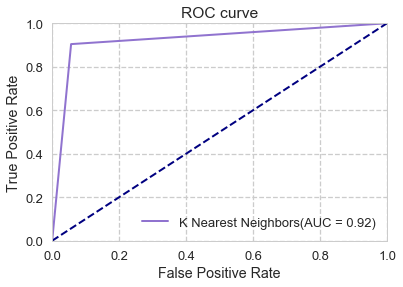

In [14]:
KNN_Acc = f1_score(y_test,y_pred)
print('KNN accuracy_CV : %.3f' % KNN_Acc) 
plotAUC(y_test,y_prob_KNN,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))

In [ ]:
plot_confusion_matrix(y_pred_KNN, normalize=True)

plt.show()


In [ ]:
###################******SVM******###############

In [15]:
#Read in csv dataset

df = pd.read_csv(os.path.join("C:/Users/bvkka/Desktop/FinalProject/Area51Financial/NN_dataset.csv"))
df.set_index('Customer_ID', inplace=True)
df.head()

,Num_CC,Dependents,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,
100001,2,1,A11,A34,A43,A65,A75,A93,A101,A143,A152,A173,A192,A201,B10,B20,B35,0
100002,1,1,A12,A32,A43,A61,A73,A92,A101,A143,A152,A173,A191,A201,B14,B22,B30,0
100003,1,2,A14,A34,A46,A61,A74,A93,A101,A143,A152,A172,A191,A201,B11,B20,B33,0
100004,1,2,A11,A32,A42,A61,A74,A93,A103,A143,A153,A173,A191,A201,B13,B23,B33,0
100005,2,2,A11,A33,A40,A61,A73,A93,A101,A143,A153,A173,A191,A201,B12,B21,B33,1


In [16]:

#Dropped columns with institution dependency and unclear data
df = df.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])
df.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [17]:
#Set the target data and value names
target = df["Default_On_Payment"]
target_names = ["No Default", "Defaulted"]

In [18]:
#Create dataframe for just the features
data = df.drop("Default_On_Payment", axis=1)
feature_names = data.columns
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,A43,A75,A101,A152,A192,A201,B10,B20,B35
100002,A43,A73,A101,A152,A191,A201,B14,B22,B30
100003,A46,A74,A101,A152,A191,A201,B11,B20,B33
100004,A42,A74,A103,A153,A191,A201,B13,B23,B33
100005,A40,A73,A101,A153,A191,A201,B12,B21,B33


In [19]:
#Label encode features dataframe
from sklearn.preprocessing import LabelEncoder

columnsToEncode = list(data)
le = LabelEncoder()

for feature in columnsToEncode:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding '+feature)
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,4,4,0,1,1,0,0,0,5
100002,4,2,0,1,0,0,4,2,0
100003,7,3,0,1,0,0,1,0,3
100004,3,3,2,2,0,0,3,3,3
100005,0,2,0,2,0,0,2,1,3


In [20]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(data, target)

In [21]:
#Create Support Vector Classification model and fit the training data
from sklearn.svm import SVC
model_SVM = SVC(kernel='rbf')
model_SVM.fit(X_train_SVM, y_train_SVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:

#Run testing data through model and score accuracy
print('Test Acc_SVM: %.3f' % model_SVM.score(X_test_SVM, y_test_SVM))

Test Acc_SVM: 0.772


In [23]:
#Use Grid Search function to hypertune C and gamma parameters
from sklearn.model_selection import GridSearchCV
cs = [10**i for i in range(0,5)]
g = [10**i for i in range(-5,0)]
param_grid = {'C': cs, 'gamma':g}
grid = GridSearchCV(model_SVM, param_grid, verbose=4)

In [24]:

#Run all combinations of variables using training data
grid.fit(X_train_SVM, y_train_SVM)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1e-05 ................................................
[CV] ....... C=1, gamma=1e-05, score=0.7002398081534772, total=   0.2s
[CV] C=1, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=1, gamma=1e-05, score=0.7, total=   0.2s
[CV] C=1, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ....... C=1, gamma=1e-05, score=0.7005604483586869, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7002398081534772, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..................... C=1, gamma=0.0001, score=0.7, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7005604483586869, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7002398081534772, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ...................... C=1, gamma=0.001, score=0.7, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7005604483586869, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7034372501998402, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] .................. C=10000, gamma=1e-05, score=0.7, total=   0.5s
[CV] C=10000, gamma=1e-05 ............................................
[CV] ... C=10000, gamma=1e-05, score=0.7005604483586869, total=   0.4s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] .. C=10000, gamma=0.0001, score=0.7034372501998402, total=   0.6s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] .............. C=10000, gamma=0.0001, score=0.7032, total=   0.6s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] .. C=10000, gamma=0.0001, score=0.7021617293835068, total=   0.7s
[CV] C=10000, gamma=0.001 ............................................
[CV] ... C=10000, gamma=0.001, score=0.7410071942446043, total=   2.7s
[CV] C=10000, gamma=0.001 ............................................
[CV] ............... C=10000, gamma=0.001, score=0.7296, total=   3.1s
[CV] C=10000, gamma=0.001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [25]:

#Find the best parameters for the data set
print(grid.best_params_)
print(grid.best_score_)

{'C': 10000, 'gamma': 0.1}
0.9197333333333333


In [26]:

#Create a new model with the hypertuned parameters
model_SVM_2 = SVC(kernel='rbf', C = grid.best_estimator_.C, gamma = grid.best_estimator_.gamma)
model_SVM_2.fit(X_train_SVM, y_train_SVM)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:

#Find the accuracy of the testing data for the new model
print('Test Acc SVM_2: %.3f' % model_SVM_2.score(X_test_SVM, y_test_SVM))

Test Acc SVM_2: 0.939


In [28]:
#Print classificatin report for hypertuned model
from sklearn.metrics import classification_report
predictions_SVM = model_SVM_2.predict(X_test_SVM)

print(classification_report (y_test_SVM, predictions_SVM, target_names=target_names))

             precision    recall  f1-score   support

 No Default       0.95      0.97      0.96       879
  Defaulted       0.92      0.87      0.89       371

avg / total       0.94      0.94      0.94      1250



In [29]:
#Create function to plot an ROC (Receiver Operating Characteristic) curve
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
predictprob_SVM = model_SVM_2.decision_function(X_test_SVM)

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

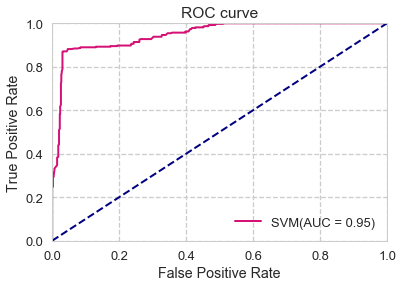

In [30]:
plotAUC(y_test_SVM,predictprob_SVM, 'SVM')

plt.show()


In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_SVM, normalize=True)

In [ ]:
######*****************NN*****#############

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade keras==2.1.5


In [ ]:
import sys
!{sys.executable} -m pip install -U keras tensorflow

In [ ]:
#import sys
#!{sys.executable} -m pip install --user --ignore-installed --no-warn-script-location --upgrade tensorflow==1.4.0
#pip install -U keras tensorflow

In [31]:

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#import tensorflow 
import tensorflow as tf
from tensorflow.python import keras
from keras.utils import to_categorical
from keras.layers import Activation, Dense
# load NN_dataset
filepath = "C:/Users/bvkka/Desktop/FinalProject/Area51Financial/NN_dataset.csv"
NN_data = pd.read_csv(filepath)
NN_data.columns

Using TensorFlow backend.


Index(['Customer_ID', 'Num_CC', 'Dependents', 'Status_Checking_Acc',
       'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc',
       'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans ', 'Housing', 'Job',
       'Telephone', 'Foreign_Worker', 'Duration_binned',
       'Credit_amount_binned', 'Age_binned', 'Default_On_Payment'],
      dtype='object')

In [32]:
# set Customer_ID as index
NN_data.set_index('Customer_ID',inplace=True)

In [33]:
NN_data['Num_CC'] = NN_data['Num_CC'].astype(str)
NN_data['Dependents'] = NN_data['Dependents'].astype(str)

In [34]:
NN_data = NN_data.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])

In [35]:
NN_data = pd.get_dummies(NN_data)

In [36]:
data_NN = NN_data.values
X_NN = data_NN[:, 1:77]
y_NN = data_NN[:, 0]

In [37]:
# one-hot encode y (y data is already label encoded)
one_hot_y = to_categorical(y_NN)
one_hot_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [38]:
#split data to train and test
from sklearn.model_selection import train_test_split

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_NN, one_hot_y, random_state=1)

In [39]:
# create basic single hidden layer model to test (ignore future version warning)
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import softmax
model_NN = Sequential()
model_NN.add(Dense(units=51, activation='relu', input_dim=45))
model_NN.add(Dense(units=51, activation='relu'))
model_NN.add(Dense(units=51, activation='relu'))
model_NN.add(Dense(units=2, activation=tf.nn.softmax))
#model_NN.add(Activation(tf.nn.softmax))


In [40]:

model_NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 51)                2346      
_________________________________________________________________
dense_2 (Dense)              (None, 51)                2652      
_________________________________________________________________
dense_3 (Dense)              (None, 51)                2652      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 104       
Total params: 7,754
Trainable params: 7,754
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
model_NN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
# Fit the model to the training data
model_NN.fit(
    X_train_NN,
    y_train_NN,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.5784 - acc: 0.6995
Epoch 2/100
 - 0s - loss: 0.5035 - acc: 0.7523
Epoch 3/100
 - 0s - loss: 0.4491 - acc: 0.7853
Epoch 4/100
 - 0s - loss: 0.3870 - acc: 0.8253
Epoch 5/100
 - 0s - loss: 0.3224 - acc: 0.8691
Epoch 6/100
 - 0s - loss: 0.2741 - acc: 0.8901
Epoch 7/100
 - 0s - loss: 0.2340 - acc: 0.9053
Epoch 8/100
 - 0s - loss: 0.1955 - acc: 0.9187
Epoch 9/100
 - 0s - loss: 0.1743 - acc: 0.9267
Epoch 10/100
 - 0s - loss: 0.1599 - acc: 0.9293
Epoch 11/100
 - 0s - loss: 0.1556 - acc: 0.9328
Epoch 12/100
 - 0s - loss: 0.1419 - acc: 0.9365
Epoch 13/100
 - 0s - loss: 0.1432 - acc: 0.9376
Epoch 14/100
 - 0s - loss: 0.1388 - acc: 0.9360
Epoch 15/100
 - 0s - loss: 0.1285 - acc: 0.9389
Epoch 16/100
 - 0s - loss: 0.1253 - acc: 0.9376
Epoch 17/100
 - 0s - loss: 0.1310 - acc: 0.9379
Epoch 18/100
 - 0s - loss: 0.1268 - acc: 0.9357
Epoch 19/100
 - 0s - loss: 0.1280 - acc: 0.9371
Epoch 20/100
 - 0s - loss: 0.1267 - acc: 0.9395
Epoch 21/100
 - 0s - loss: 0.1271 - acc: 0.9397
E

In [43]:
model_NN_loss, model_NN_accuracy = model_NN.evaluate(
    X_test_NN, y_test_NN, verbose=2)
print(f"model - Loss: {model_NN_loss}, Accuracy: {model_NN_accuracy}")

model - Loss: 0.1014716093301773, Accuracy: 0.9408


In [44]:
from sklearn.metrics import classification_report

predictions_NN = model_NN.predict(X_test_NN).round()
print(classification_report(y_test_NN, predictions_NN, target_names=["no-default", "default"]))

             precision    recall  f1-score   support

 no-default       0.95      0.97      0.96       901
    default       0.93      0.85      0.89       349

avg / total       0.94      0.94      0.94      1250



In [45]:
def decode(datum):
    return np.argmax(datum)

In [46]:
output1 = []

for i in range(y_test_NN.shape[0]):
    datum = y_test_NN[i]
    decoded_datum = decode(y_test_NN[i])
    output1.append(decoded_datum)

In [47]:

decoded_y_test = output1

In [48]:
output2 = []

for i in range(predictions_NN.shape[0]):
    datum = predictions_NN[i]
    decoded_datum = decode(predictions_NN[i])
    output2.append(decoded_datum)

In [49]:
decoded_predictions = output2

In [50]:
#Create function to calculate Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model_NN, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(decoded_y_test, model_NN, labels=[0, 1])
    classes=["No Default", "Defaulted"]
    
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylim(-0.5,1.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(decoded_predictions, normalize=True)

In [51]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

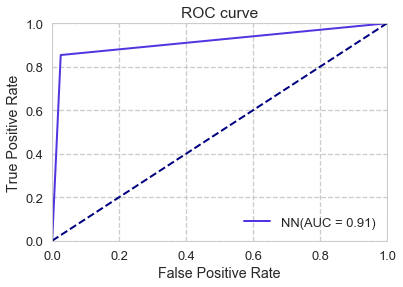

In [52]:
plotAUC(decoded_y_test,decoded_predictions, 'NN')

plt.show()

#######  Precision,recall,F1score for all models ####


In [53]:
from sklearn.metrics import classification_report
print("KNN",classification_report(y_test, y_prob_KNN, target_names=None))
print('model KNN - Accuracy : %.3f' % KNN_Acc)
print("SVM",classification_report(y_test_SVM, predictions_SVM, target_names=None))
print('model SVM - Accuracy: %.3f' % model_SVM_2.score(X_test_SVM, y_test_SVM))

print("NN",classification_report(y_test_NN, predictions_NN, target_names=None))
print(f"model NN - Accuracy: {model_NN_accuracy}")

KNN              precision    recall  f1-score   support

          0       0.96      0.94      0.95       885
          1       0.87      0.90      0.89       365

avg / total       0.93      0.93      0.93      1250

model KNN - Accuracy : 0.886
SVM              precision    recall  f1-score   support

          0       0.95      0.97      0.96       879
          1       0.92      0.87      0.89       371

avg / total       0.94      0.94      0.94      1250

model SVM - Accuracy: 0.939
NN              precision    recall  f1-score   support

          0       0.95      0.97      0.96       901
          1       0.93      0.85      0.89       349

avg / total       0.94      0.94      0.94      1250

model NN - Accuracy: 0.9408


######Confusion Matrix for all models#####


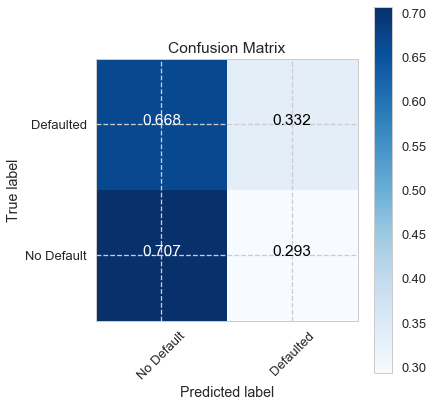

model KNN - Accuracy : 0.886


In [58]:
#KNN
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred_KNN, normalize=True)
print('model KNN - Accuracy : %.3f' % KNN_Acc)



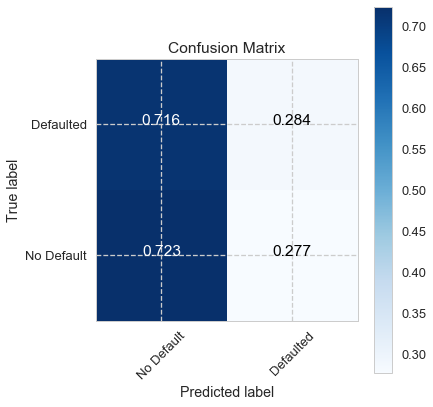

model SVM - Accuracy: 0.939


In [57]:
###SVM
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_SVM, normalize=True)
print('model SVM - Accuracy: %.3f' % model_SVM_2.score(X_test_SVM, y_test_SVM))

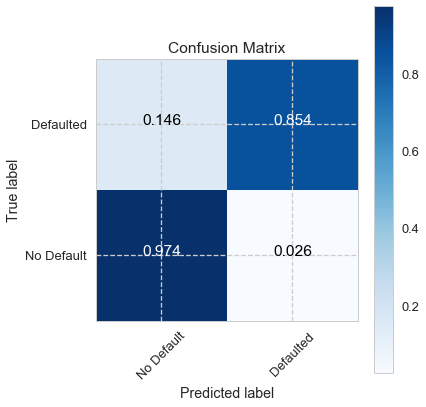

model NN - Accuracy: 0.9408


In [56]:
###NN
plt.figure(figsize=(6,6))
plot_confusion_matrix(decoded_predictions, normalize=True)
print(f"model NN - Accuracy: {model_NN_accuracy}")

#####ROC CURVES###

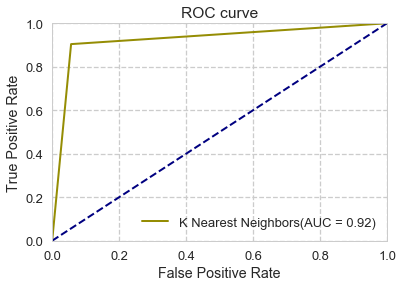

model KNN - Accuracy : 0.886


In [61]:
##KNN
plotAUC(y_test,y_prob_KNN,'K Nearest Neighbors')
print('model KNN - Accuracy : %.3f' % KNN_Acc)


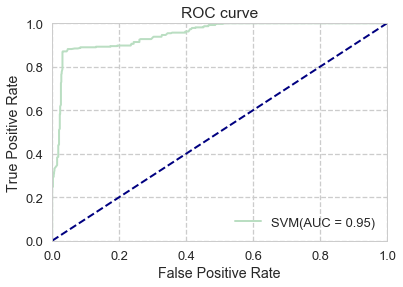

model SVM - Accuracy: 0.939


In [62]:
###SVM
plotAUC(y_test_SVM,predictprob_SVM, 'SVM')
print('model SVM - Accuracy: %.3f' % model_SVM_2.score(X_test_SVM, y_test_SVM))

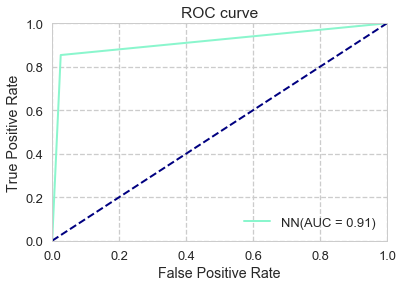

model NN - Accuracy: 0.9408


In [74]:
###NN
plotAUC(decoded_y_test,decoded_predictions, 'NN')
print(f"model NN - Accuracy: {model_NN_accuracy}")